# Employee Attrition Sets Us Back - Anticipating Attrition Factors
## A Case Study Using IBM's Notional HR Data

The are many outright and hidden costs to employees chosing to leave the Firm.  Whether it's the cost of recruiting, hiring, on-boarding and training another employee to replace them; the cost of lost revenue and productivity; the impact to our reputation with customers; or the setback in our goal to build out an Analytics capability which will help transform our client spaces over time - there is no question that losing talent hurts the business.

All that said - attrition at some level is a fact of life.  The questions are: How can data help us understand what drives attrition and if we understand some of the factors that help us predict an increased probality that an employee may leave the team - can we take action to keep our best performers?

### Hypothisis

A Hypothisis for this data science project is that there are one or more variables in an HR dataset which can help an organization predict the potential that an employee may to resign with a reasonable degree of confidence.

### Goals, Success Measures and Risks   

The goal for this project will be to do exploratory analysis on an HR dataset which contains some common information on employees to include if they have left the business.  This will be followed by indentification of feature variables which have a strong positive or negative relationship on employees who stay or leave.  Some initial measures of success will include the indentification of one or two variables which have a strong correlation to attrition/retention and then the ability to successfully build one or more models which can be used to predict if an employee is likely to stay or leave an organization.

There are many inherent risks and limitations in this analysis.  Some of them include the possibility that the strongest predictors for attrition are not contained in the data set or that the data has quality limitations.  It is likely that even strong predictors are by no means a guarentee that an employee may leave - and so the use of this information could have negative consequences if not handled correctly.  Another risk for the goals of this project, is that the results from this data set are not transferable to other populations of employees.  There are also the risks/limitations of the ability to consistently collect data across different organizations.

### Source and DataSet

The dataset I have chosen for this project is from Kaggle datasets, titled "IBM HR Analytics Employee Attrition & Performance: WA_Fn-UseC_-HR-Employee-Attrition.csv".  It is a fictional dataset provided by IBM data scientists and will serve as a useful exercise for this type of problem.  Perhaps the methodology and approaches in this capstone project can be applied to other employee datasets to understand if the model produces similar predictive power when tested against real population datasets.  The data does have some challenges - two in particular.  First there is a concern that the number of records is on 1.4K - not large enough for the type of modeling I'd like to do.  I can use the 'bootstrap' methodology to expand the volume of records.  The second concern is that the data set is 'fake'.  It is not clear from the description if it's based on real findings from IBM and can be extrapolated to real predictors if it is simply used to practice building HR models.  For this exercise I am assuming it is a reasonable representation of a real workforce and has been sanitized to protect any privacy and business sensitivites.

### Exploratory Data Analysis

###  

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

atr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [2]:
atr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   
2          ...                                  2            80   
3          ...                                  3            80   
4          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [3]:
print(atr.index)
print(atr.shape)

RangeIndex(start=0, stop=1470, step=1)
(1470, 35)


In [4]:
atr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

The dataset is looking fairly clean - values in every row and column and data types make sense on first glance

In [5]:
atr.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [6]:
# zip together the two EDA outputs to see how many new columns to expect with dummy variables.

df_atr = pd.DataFrame(atr.dtypes)
df_atr['num_unique'] = atr.nunique().values
df_atr


0  num_unique
Age                        int64          43
Attrition                 object           2
BusinessTravel            object           3
DailyRate                  int64         886
Department                object           3
DistanceFromHome           int64          29
Education                  int64           5
EducationField            object           6
EmployeeCount              int64           1
EmployeeNumber             int64        1470
EnvironmentSatisfaction    int64           4
Gender                    object           2
HourlyRate                 int64          71
JobInvolvement             int64           4
JobLevel                   int64           5
JobRole                   object           9
JobSatisfaction            int64           4
MaritalStatus             object           3
MonthlyIncome              int64        1349
MonthlyRate                int64        1427
NumCompaniesWorked         int64          10
Over18                    object           1
OverTime                  object           2
PercentSalaryHike          int64          15
PerformanceRating          int64           2
RelationshipSatisfaction   int64           4
StandardHours              int64           1
StockOptionLevel           int64           4
TotalWorkingYears          int64          40
TrainingTimesLastYear      int64           7
WorkLifeBalance            int64           4
YearsAtCompany             int64          37
YearsInCurrentRole         int64          19
YearsSinceLastPromotion    int64          16
YearsWithCurrManager       int64          18

In [7]:
print(df_atr.loc[df_atr[0]=='object',:])
print('\n')
print(df_atr.loc[df_atr[0]=='object',:]['num_unique'].sum())

                     0  num_unique
Attrition       object           2
BusinessTravel  object           3
Department      object           3
EducationField  object           6
Gender          object           2
JobRole         object           9
MaritalStatus   object           3
Over18          object           1
OverTime        object           2


31


Some fields will clearly need to be grouped into categories.  Initial look indicates daily rate, distance from home, hourly rate, monthly income, monthly rate, total working years, years at company, years in current role, years since last promo, years with currrent manager.  Need to explore relationships to see if there are obvious logical grouping within these columns.

Some fields do not appear to have more than one unique value and could be dropped potentially (standard hours, over 18, employee count (this may be useful for sum/avg. calculations perhaps))

Also - it looks like there is potential for multicolineratity.  Some of these columns probably have direct relationships with each other (most likely years at company and years with current manager - though these have different implications, and the income/rate fields).

Will need to explore this further with visuals

In [8]:
atr.describe(include='all')

Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        EmployeeCount  EmployeeNumber          ...           \
count          1470.0     1470.000000          ...            
unique            NaN             NaN          ...            
top               NaN             NaN          ...            
freq              NaN             NaN          ...            
mean              1.0     1024.865306          ...            
std               0.0      602.024335          ...            
min               1.0        1.000000          ...            
25%               1.0      491.250000          ...            
50%               1.0     1020.500000          ...            
75%               1.0     1555.750000          ...            
max               1.0     2068.000000          ...            

        RelationshipSatisfaction StandardHours  StockOptionLevel  \
count                1470.000000        1470.0       1470.000000   
unique                       NaN           NaN               NaN   
top                          NaN           NaN               NaN   
freq                         NaN           NaN               NaN   
mean                    2.712245          80.0          0.793878   
std                     1.081209           0.0          0.852077   
min                     1.000000          80.0          0.000000   
25%                     2.000000          80.0          0.000000   
50%                     3.000000          80.0          1.000000   
75%                     4.000000          80.0          1.000000   
max                     4.000000          80.0          3.000000   

        TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
count         1470.000000            1470.000000     1470.000000   
unique                NaN                    NaN             NaN   
top                   NaN                    NaN             NaN   
freq                  NaN                    NaN             NaN   
mean            11.279592               2.799320        2.761224   
std              7.780782               1.289271        0.706476   
min              0.000000               0.000000        1.000000   
25%              6.000000               2.000000        2.000000   
50%             10.000000               3.000000        3.000000   
75%             15.000000               3.000000        3.000000   


In [9]:
atr.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [10]:
atr_drop = atr.drop(['EmployeeCount','Over18','StandardHours'], axis=1)

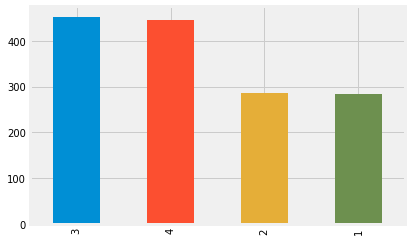

In [11]:
# Need to do some basic visual analysis of categorical variables and relationship to Attrition
atr_drop.EnvironmentSatisfaction.value_counts().plot(kind='bar'); 

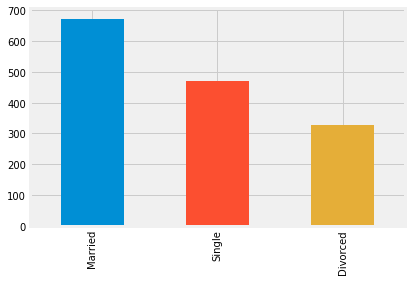

In [12]:
atr_drop.MaritalStatus.value_counts().plot(kind='bar');

In [13]:
atr_drop['Percent_Attrit']= atr_drop.Attrition.value_counts()
atr_drop.Attrition.value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

In [14]:
#atr_drop['Percent_Attrit']= atr_drop.Attrition.value_counts()/atr_drop.EmployeeNumber.sum()
#Percent_Attrit

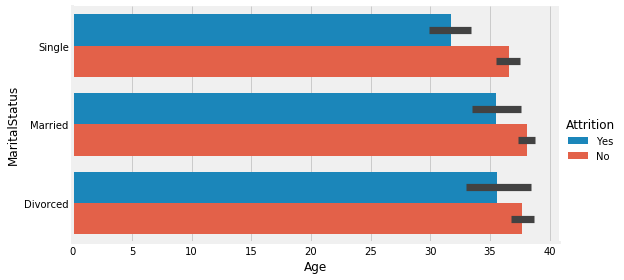

In [15]:
#sns.catplot(x="MaritalStatus", y="Age", hue="Attrition", col="BusinessTravel",data=atr_drop, kind="bar", height=4, aspect=.7)
sns.catplot(x="Age", y="MaritalStatus", hue="Attrition", data=atr_drop, kind="bar", height=4, aspect=2);

Initial Indications that younger single employees are less likely to attrit

*****Need to look at this with different chart and make sure age on Y axis is not skwing picture of attrition for single vs. other cats

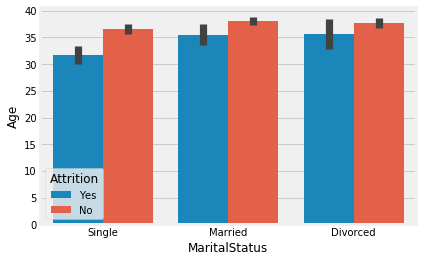

In [16]:
sns.barplot(x="MaritalStatus", y='Age', hue="Attrition", data=atr_drop);

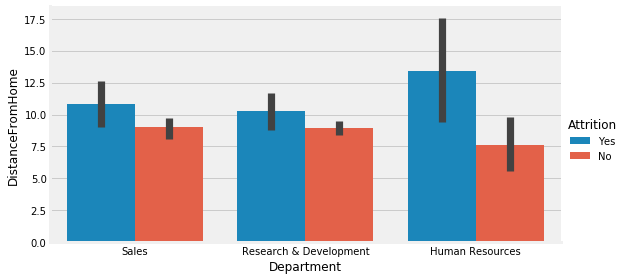

In [17]:
sns.catplot(x="Department", y="DistanceFromHome", hue="Attrition",data=atr_drop, kind="bar", height=4, aspect=2);

In [18]:
atr1 = pd.get_dummies(atr_drop, drop_first=True) 

In [19]:
print(atr1.shape)

(1470, 47)


In [20]:
#atr1.describe(include='all')
atr1.nunique()

Age                                    43
DailyRate                             886
DistanceFromHome                       29
Education                               5
EmployeeNumber                       1470
EnvironmentSatisfaction                 4
HourlyRate                             71
JobInvolvement                          4
JobLevel                                5
JobSatisfaction                         4
MonthlyIncome                        1349
MonthlyRate                          1427
NumCompaniesWorked                     10
PercentSalaryHike                      15
PerformanceRating                       2
RelationshipSatisfaction                4
StockOptionLevel                        4
TotalWorkingYears                      40
TrainingTimesLastYear                   7
WorkLifeBalance                         4
YearsAtCompany                         37
YearsInCurrentRole                     19
YearsSinceLastPromotion                16
YearsWithCurrManager              

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


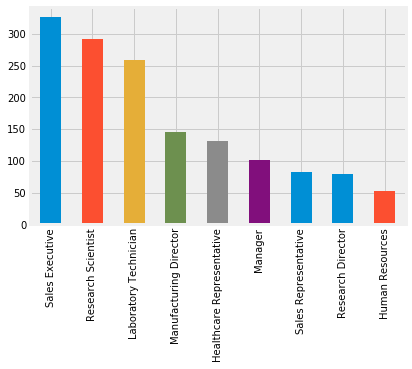

In [21]:
print(atr.JobRole.value_counts())
atr.JobRole.value_counts().plot(kind='bar'); 

In [104]:
#p1 = plt.bar(atr.JobRole.value_counts, height=1)
#p2 = plt.bar(atr.Attrition.value_counts, height =1)

#atr.JobRole.value_counts().plot(kind='bar'); 

#atr.Attrition.value_counts().plot(kind='bar', stacked=True);

In [94]:
from matplotlib import rc

# y-axis in bold 
rc('font', weight='bold') 

# Values of each group 
#bars1 = [12, 28, 1, 8, 22] 
#bars2 = [28, 7, 16, 4, 10] 
#bars3 = [25, 3, 23, 25, 17] 
bars1 = atr1.Attrition_Yes.value_counts('Attrition_Yes'==1)
bars2 = atr1.Attrition_Yes.value_counts('Attrition_Yes'==0)
# Heights of bars1 + bars2 (TO DO better) 
#bars = [40, 35, 17, 12, 32] 

# The position of the bars on the x-axis 
r = [0,1,2,3,4] 

# Names of group and bar width 
names = ['JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative'] 
barWidth = 1 

# Create brown bars 
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth) 

# Create green bars (middle), on top of the firs ones 
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth) 

# Create green bars (top) 
#plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth) 

# Custom X axis 
plt.xticks(r, names, fontweight='bold') 
plt.xlabel("group") 

# Show graphic
plt.show() 


In [22]:
atr1.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Percent_Attrit',
       'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', '

In [23]:
atr1.describe(include='all')

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction      ...       \
count  1470.000000      1470.000000      ...        
mean      2.063946         2.728571      ...        
std       1.106940         1.102846      ...        
min       1.000000         1.000000      ...        
25%       1.000000         2.000000      ...        
50%       2.000000         3.000000      ...        
75%       3.000000         4.000000      ...        
max       5.000000         4.000000      ...        

       JobRole_Laboratory Technician  JobRole_Manager  \
count                    1470.000000      1470.000000   
mean                        0.176190         0.069388   
std                         0.381112         0.254199   
min                         0.000000         0.000000   
25%                         0.000000         0.000000   
50%                         0.000000         0.000000   
75%                         0.000000         0.000000   
max                         1.000000         1.000000   

       JobRole_Manufacturing Director  JobRole_Research Director  \
count                     1470.000000                1470.000000   
mean                         0.098639                   0.054422   
std                          0.298279                   0.226925   
min                          0.000000                   0.000000   
25%                          0.000000                   0.000000   
50%                          0.000000                   0.000000   
75%                          0.000000                   0.000000   
max                          1.000000                   1.000000   

       JobRole_Research Scientist  JobRole_Sales Executive  \
count                 1470.000000              1470.000000   
mean                     0.198639                 0.221769   
std                      0.399112                 0.415578   
min                      0.000000                 0.000000   
25%                      0.000000                 0.000000   
50%                      0.000000                 0.000000   
75%                      0.000000                 0.000000   
max                      1.000000                 1.000000   

       JobRole_Sales Representative  MaritalStatus_Married  \
count                   1470.000000            1470.000000   
mean                       0.056463               0.457823   
std                        0.230891               0.498387   
min                        0.000000               0.000000   
25%                        0.000000               0.000000   
50%                        0.000000               0.000000   
75%                        0.000000               1.000000   
max                        1.000000             

In [24]:
##  Need to come back and review what visuals I can do to see the data all at once.  Not sure what is driving this error (num of columns)?

#pd.plotting.scatter_matrix(atr1.drop('Attrition_Yes', axis=1), c = atr1['Attrition_Yes'],figsize=(16, 12));

In [25]:
atr1.Attrition_Yes.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition_Yes, dtype: float64

In [26]:
atr1.corr()

Age  DailyRate  DistanceFromHome  \
Age                                1.000000   0.010661         -0.001686   
DailyRate                          0.010661   1.000000         -0.004985   
DistanceFromHome                  -0.001686  -0.004985          1.000000   
Education                          0.208034  -0.016806          0.021042   
EmployeeNumber                    -0.010145  -0.050990          0.032916   
EnvironmentSatisfaction            0.010146   0.018355         -0.016075   
HourlyRate                         0.024287   0.023381          0.031131   
JobInvolvement                     0.029820   0.046135          0.008783   
JobLevel                           0.509604   0.002966          0.005303   
JobSatisfaction                   -0.004892   0.030571         -0.003669   
MonthlyIncome                      0.497855   0.007707         -0.017014   
MonthlyRate                        0.028051  -0.032182          0.027473   
NumCompaniesWorked                 0.299635   0.038153         -0.029251   
PercentSalaryHike                  0.003634   0.022704          0.040235   
PerformanceRating                  0.001904   0.000473          0.027110   
RelationshipSatisfaction           0.053535   0.007846          0.006557   
StockOptionLevel                   0.037510   0.042143          0.044872   
TotalWorkingYears                  0.680381   0.014515          0.004628   
TrainingTimesLastYear             -0.019621   0.002453         -0.036942   
WorkLifeBalance                   -0.021490  -0.037848         -0.026556   
YearsAtCompany                     0.311309  -0.034055          0.009508   
YearsInCurrentRole                 0.212901   0.009932          0.018845   
YearsSinceLastPromotion            0.216513  -0.033229          0.010029   
YearsWithCurrManager               0.202089  -0.026363          0.014406   
Percent_Attrit                          NaN        NaN               NaN   
Attrition_Yes                     -0.159205  -0.056652          0.077924   
BusinessTravel_Travel_Frequently  -0.024743  -0.011776          0.005081   
BusinessTravel_Travel_Rarely       0.028791   0.002078         -0.020116   
Department_Research & Development  0.017883   0.014871         -0.008117   
Department_Sales                  -0.027549  -0.003616          0.014085   
EducationField_Life Sciences       0.016824   0.004028         -0.024499   
EducationField_Marketing           0.038162  -0.064449          0.039294   
EducationField_Medical            -0.006354   0.034202          0.013486   
EducationField_Other              -0.041466  -0.003893         -0.007969   
EducationField_Technical Degree   -0.027604   0.030869         -0.014802   
Gender_Male                       -0.036311  -0.011716         -0.001851   
JobRole_Human Resources           -0.029856  -0.021156         -0.024089   
JobRole_Laboratory Technician     -0.143176  -0.006728          0.012369   
JobRole_Manager                    0.294248  -0.013224         -0.039190   
JobRole_Manufacturing Director     0.049726  -0.005302          0.011848   
JobRole_Research Director          0.185891  -0.000021         -0.022351   
JobRole_Research Scientist        -0.146518  -0.002624         -0.010986   
JobRole_Sales Executive           -0.002001  -0.000513          0.030761   
JobRole_Sales Representative      -0.175785   0.005375         -0.015994   
MaritalStatus_Married              0.083919   0.040035          0.030232   
MaritalStatus_Single              -0.119185  -0.075835         -0.027445   
OverTime_Yes                       0.028062   0.009135          0.025514   

                                   Education  EmployeeNumber  \
Age                                 0.208034       -0.010145   
DailyRate                          -0.016806       -0.050990   
DistanceFromHome                    0.021042        0.032916   
Education                           1.000000        0.042070   
EmployeeNumber                      0.042070        1.000000   
Environ

In [93]:
#HeatChart goes here


In [27]:
print(list(atr1.corr()['Attrition_Yes'].sort_values(ascending=False).abs()[1:16].index))
print('\n')
print(print(list(atr1.corr()['Attrition_Yes'].sort_values(ascending=False).abs()[1:16])))

['OverTime_Yes', 'MaritalStatus_Single', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'JobRole_Laboratory Technician', 'Department_Sales', 'DistanceFromHome', 'EducationField_Technical Degree', 'EducationField_Marketing', 'NumCompaniesWorked', 'JobRole_Human Resources', 'Gender_Male', 'JobRole_Sales Executive', 'MonthlyRate', 'PerformanceRating']


[0.24611799424579708, 0.17541855360922304, 0.1572342701147958, 0.11514276554505017, 0.09829048545960378, 0.08085520213605311, 0.07792358295570358, 0.06935459476481899, 0.05578066572176351, 0.04349373905781376, 0.03621508206985559, 0.029453253175140102, 0.019774368459259877, 0.015170212530471421, 0.002888751711080946]
None


In [28]:
# Need to do seperate analysis on the integer features from the categorical features - to pair down the columns for modeling

In [29]:
integer_cols = atr_drop.select_dtypes(include=np.number)
integer_features = list(integer_cols.columns)
integer_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Percent_Attrit']

In [30]:
integer_feats_set1= integer_features[0:12]
integer_feats_set1

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate']

In [31]:
integer_feats_set2= integer_features[12:24]
integer_feats_set2

['NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [32]:
integer_feats_set3= integer_features[0:6]+integer_features[18:24]
integer_feats_set3

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [33]:
integer_feats_set4= integer_features[0:6]+integer_features[12:18]
integer_feats_set4

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears']

In [34]:
integer_feats_set5= integer_features[6:12]+integer_features[18:24]
integer_feats_set5

['HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [35]:
integer_feats_set6= integer_features[6:12]+integer_features[12:18]
integer_feats_set6

['HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears']

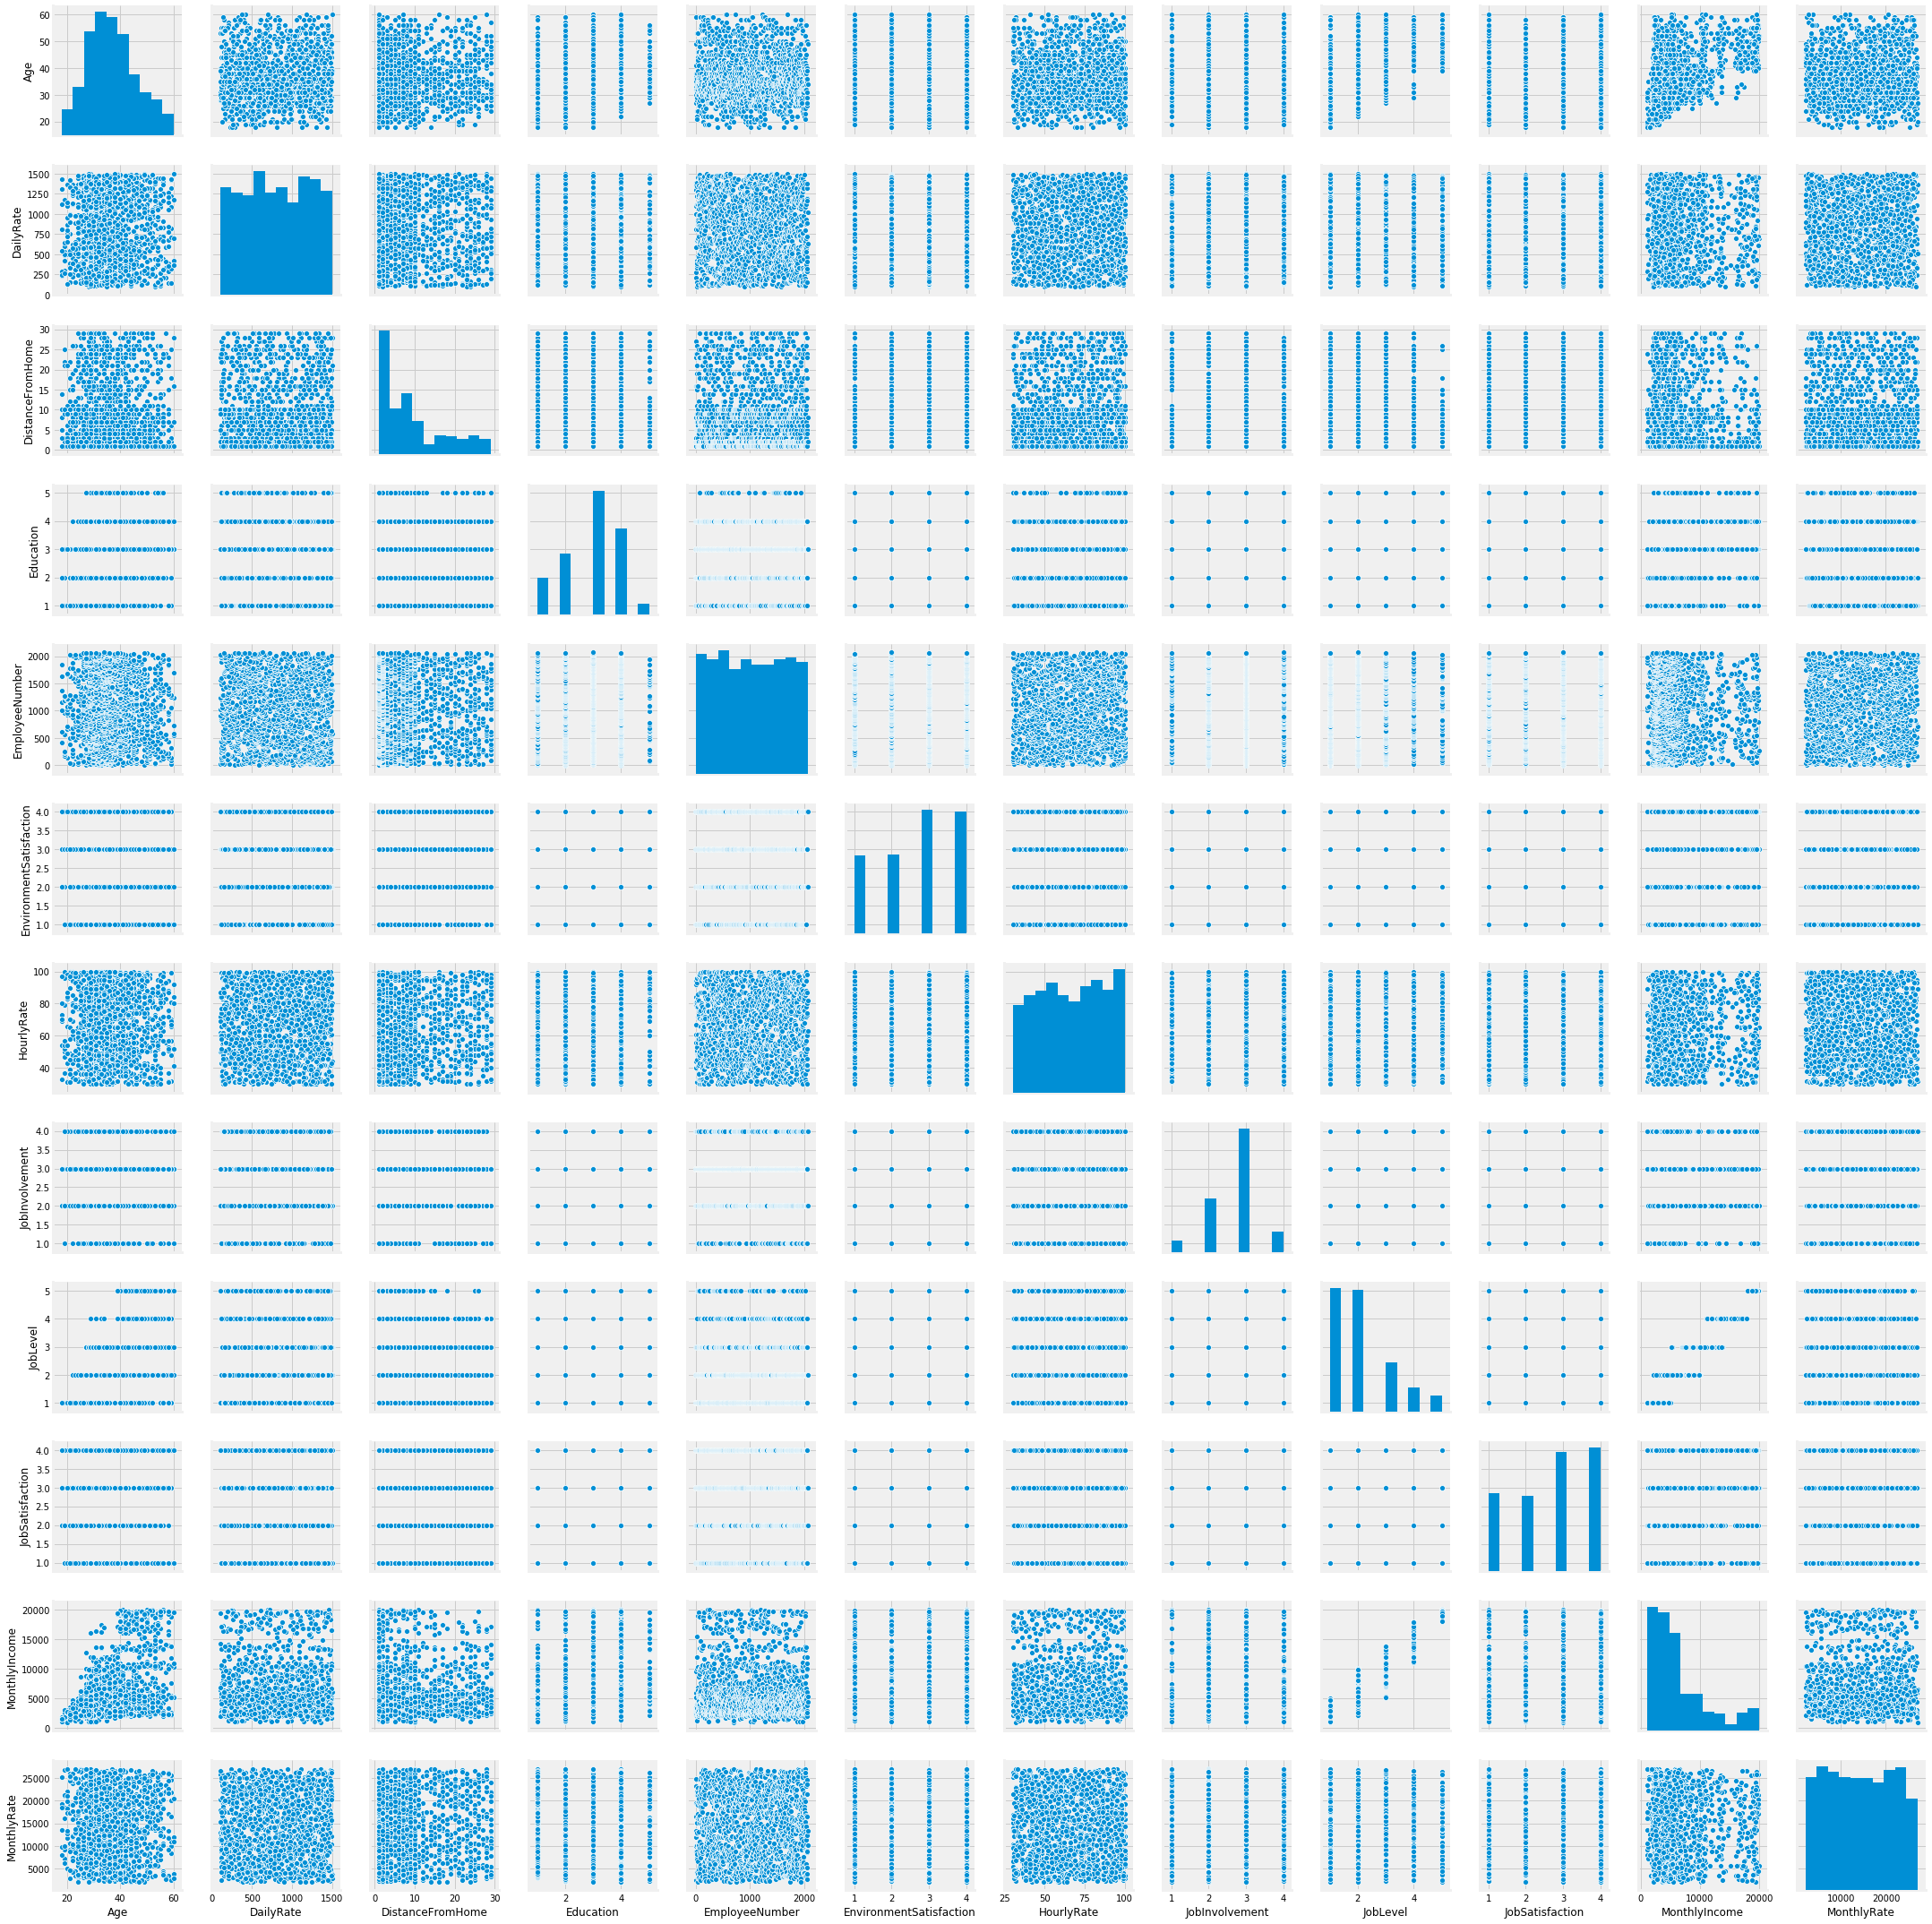

In [36]:
sns.pairplot(atr1[integer_feats_set1]);

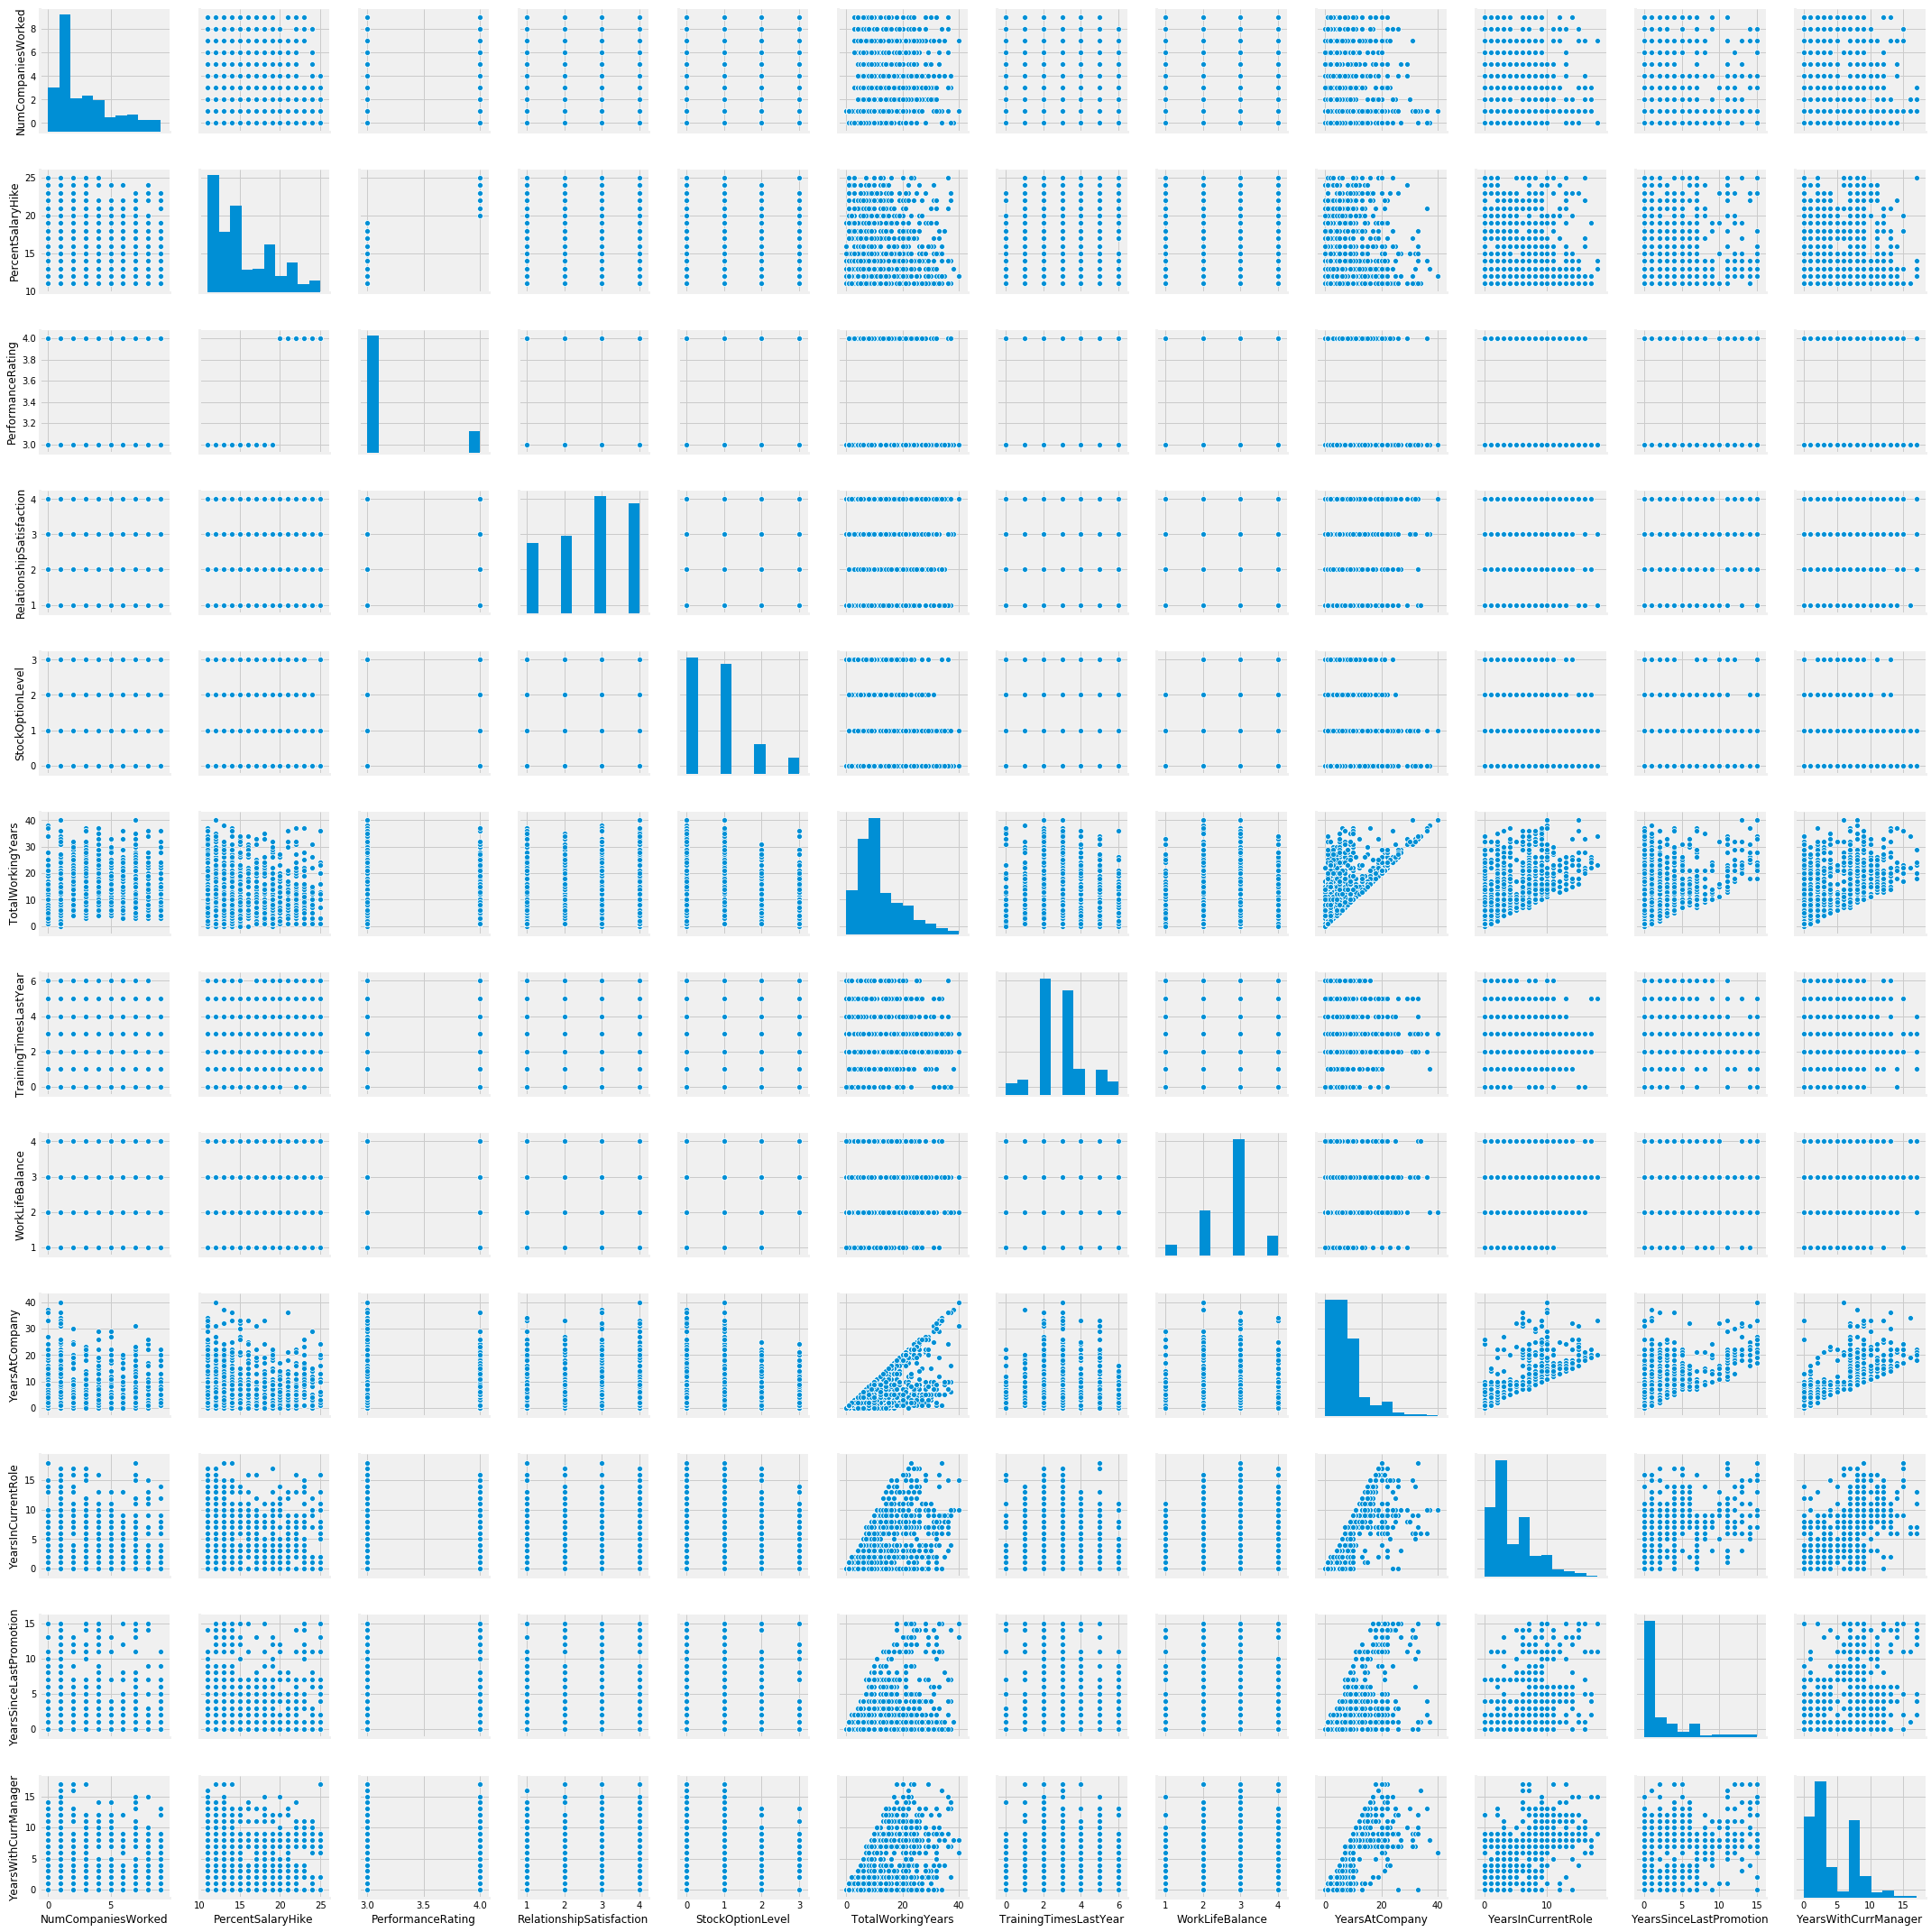

In [37]:
sns.pairplot(atr1[integer_feats_set2]);

Some fields for feature engineeering may include total years / years at current company
seeing correlations as expected in age and years experience, job levels and salary - etc.  Need to figure out what to do about this

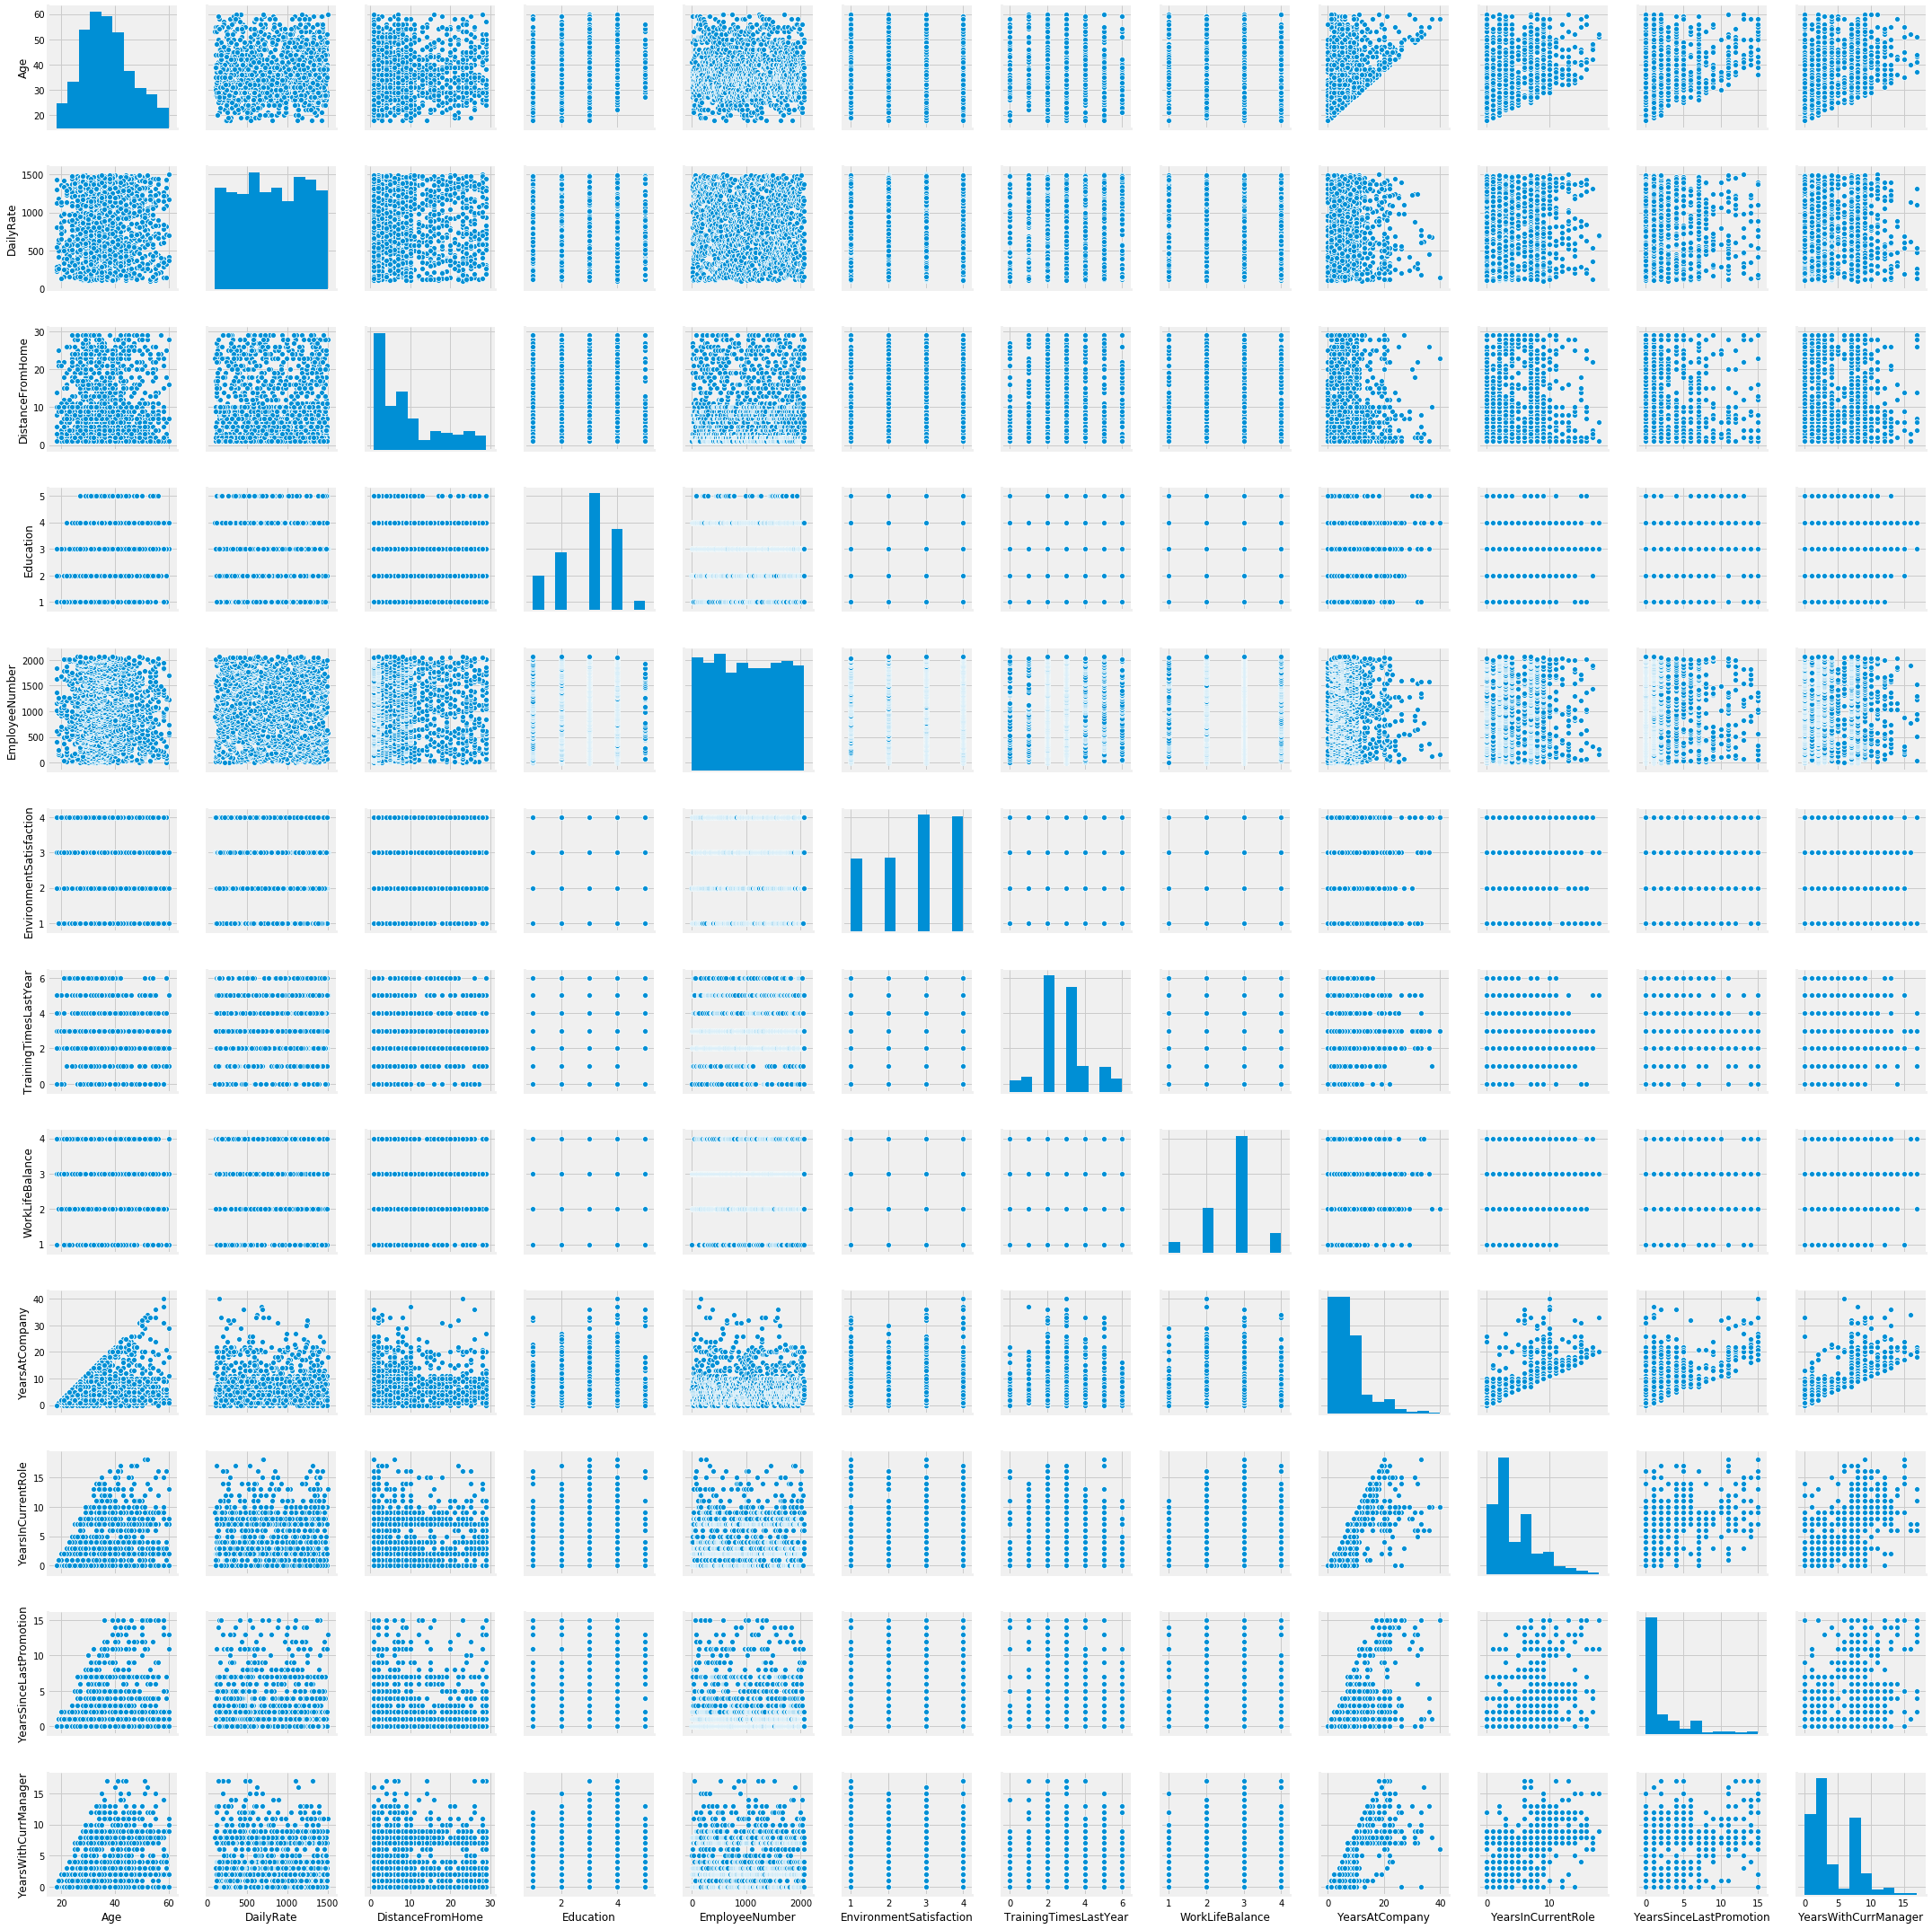

In [38]:
sns.pairplot(atr1[integer_feats_set3]);

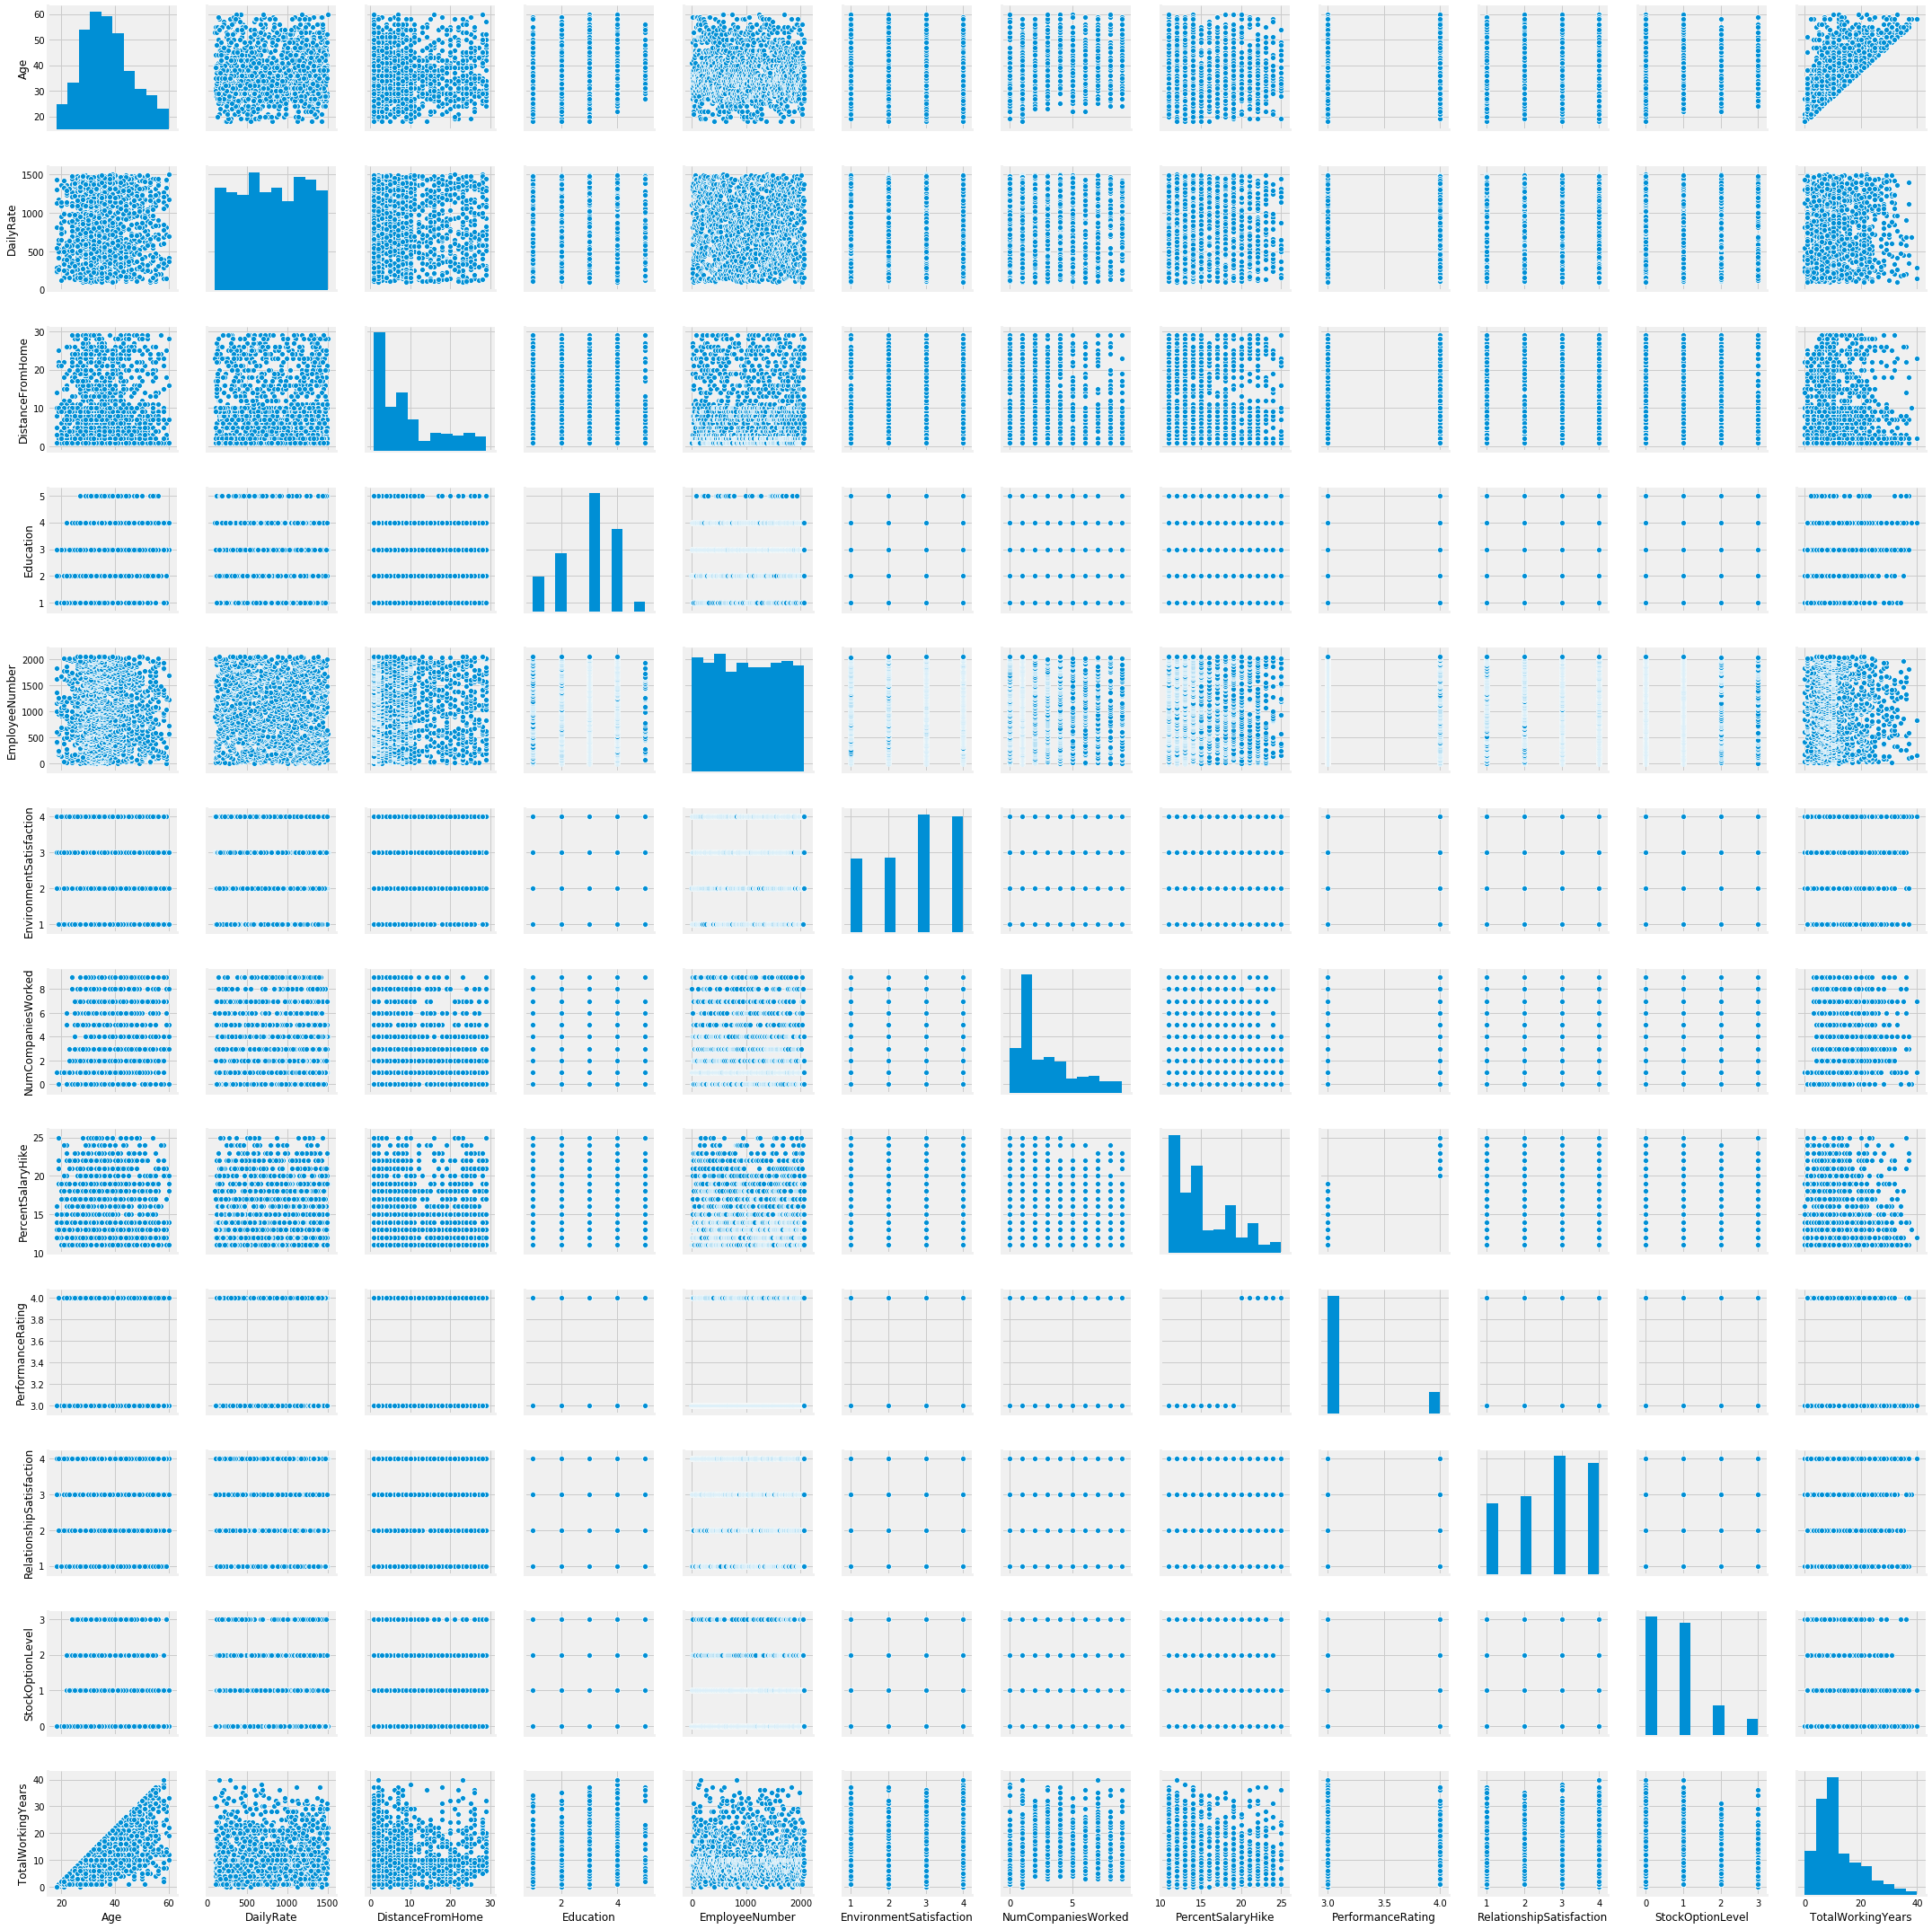

In [39]:
sns.pairplot(atr1[integer_feats_set4]);

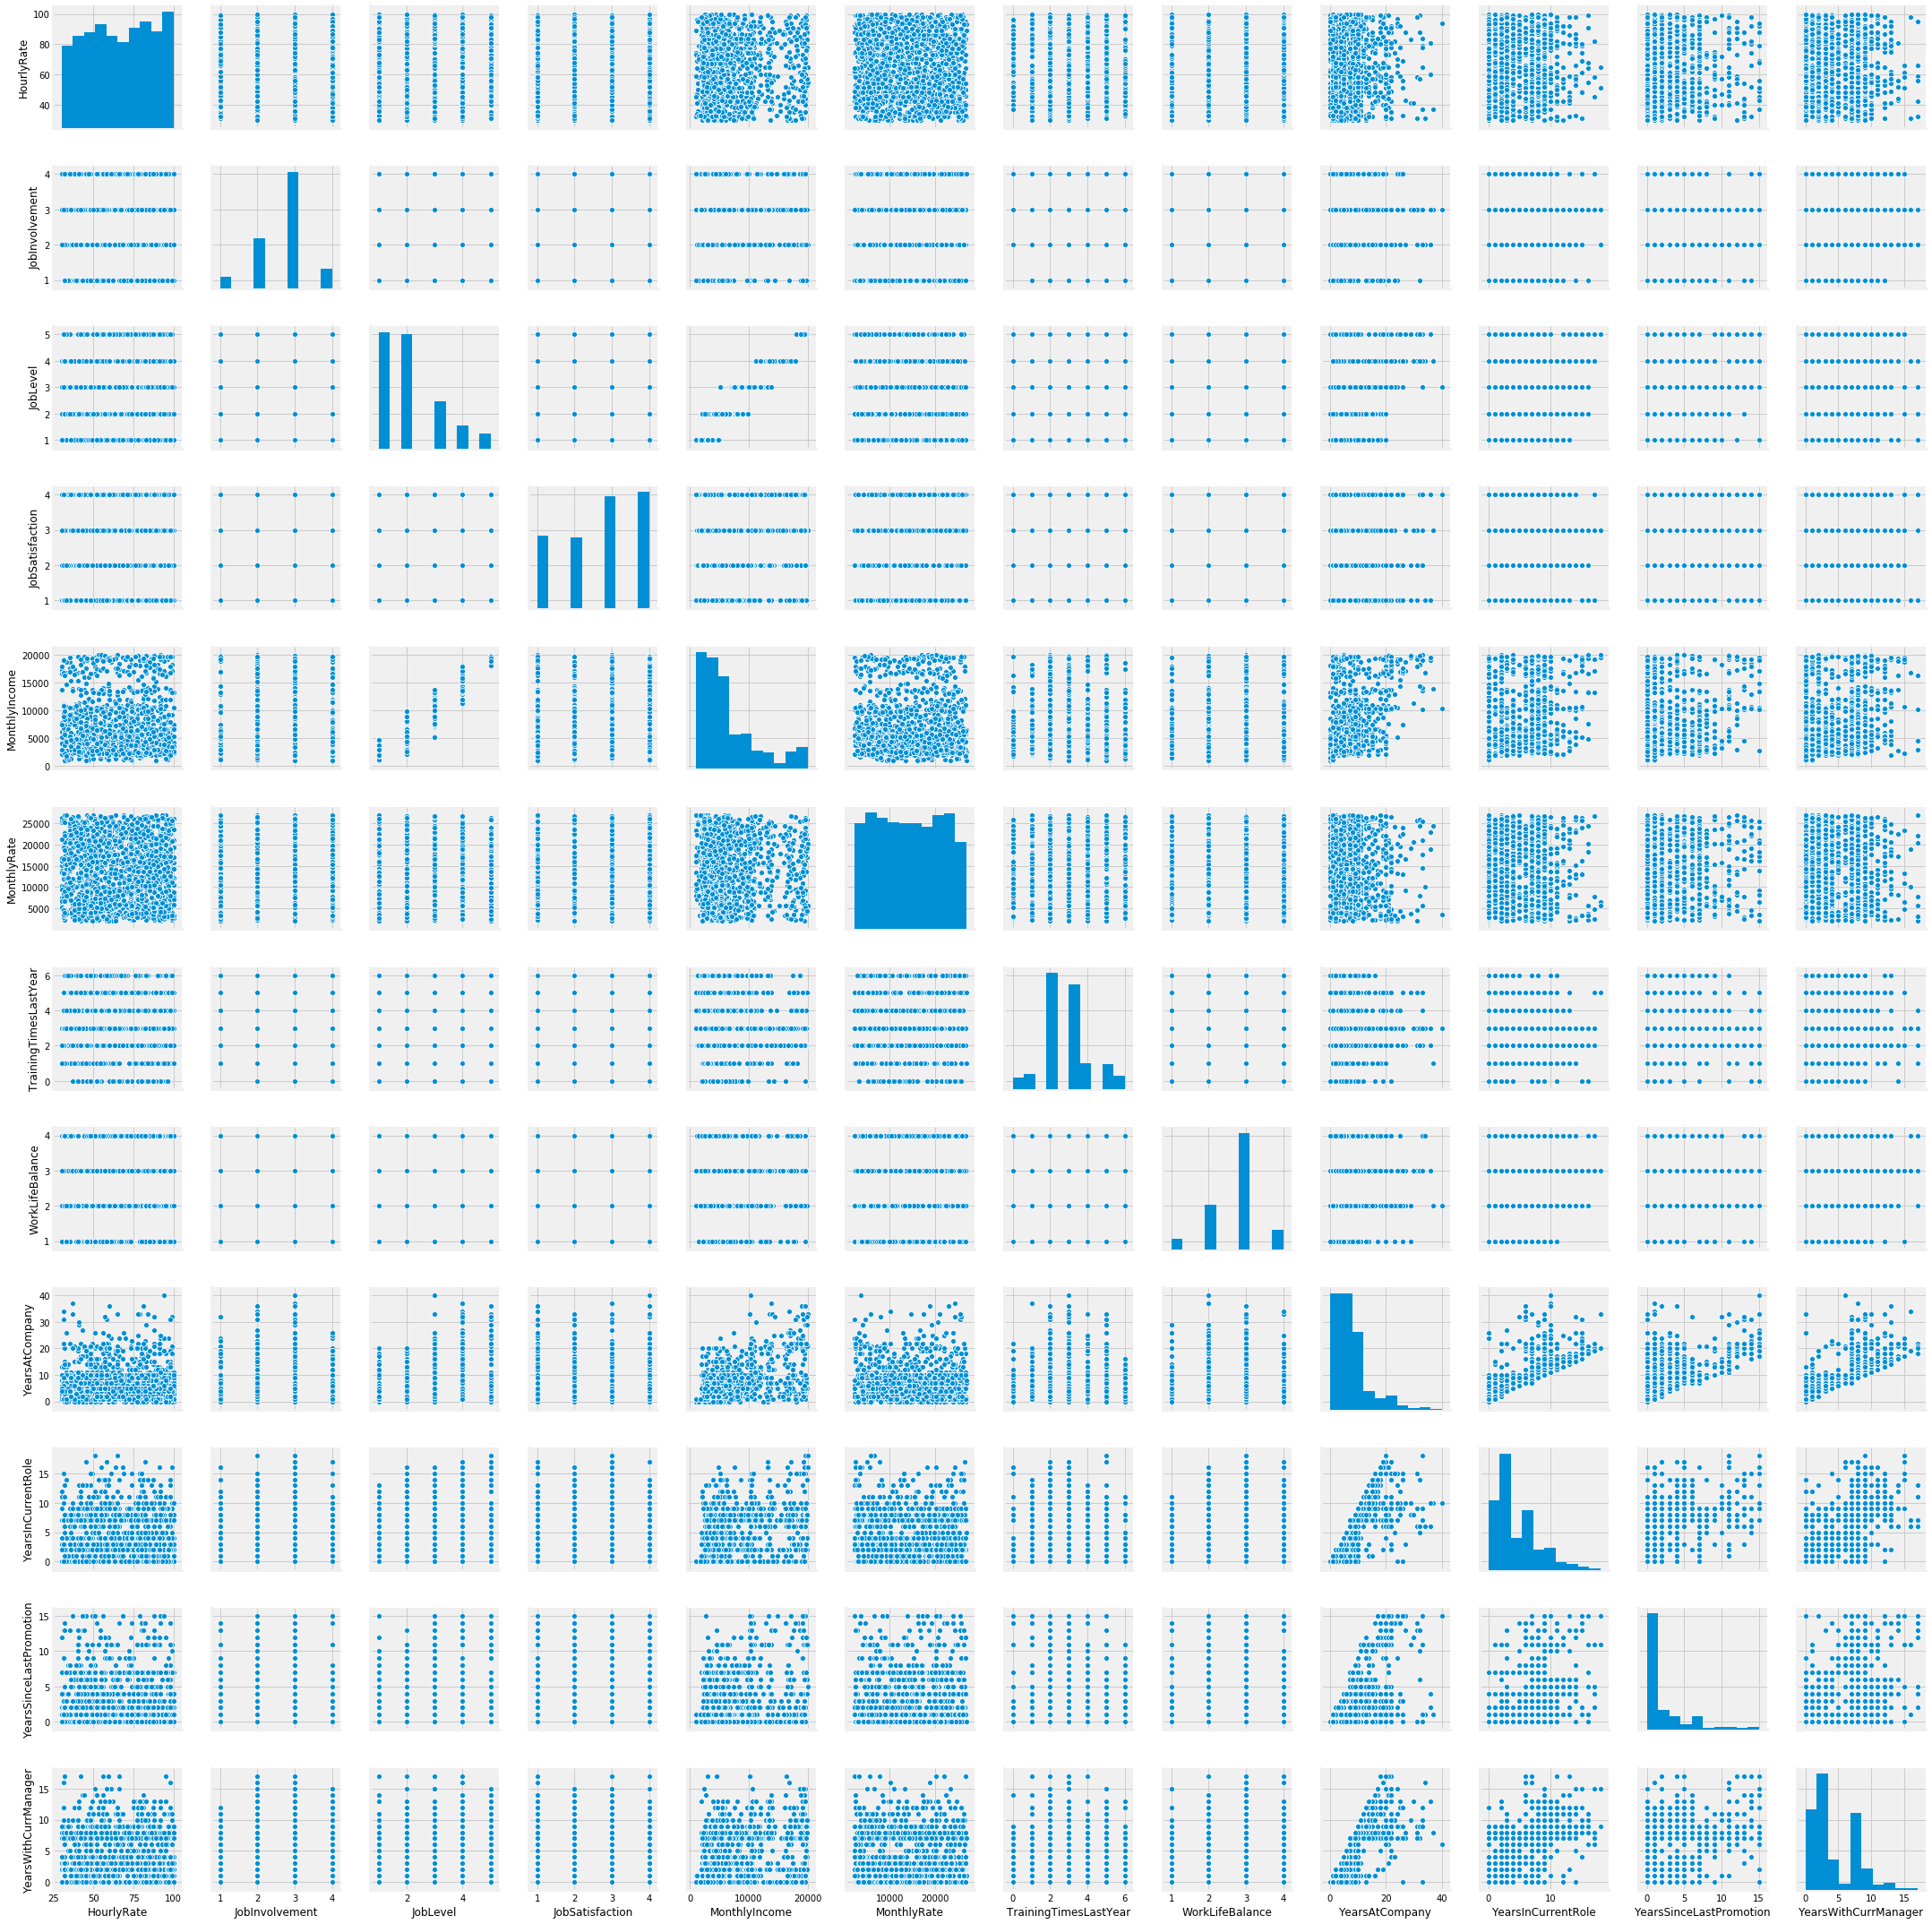

In [40]:
sns.pairplot(atr1[integer_feats_set5]);

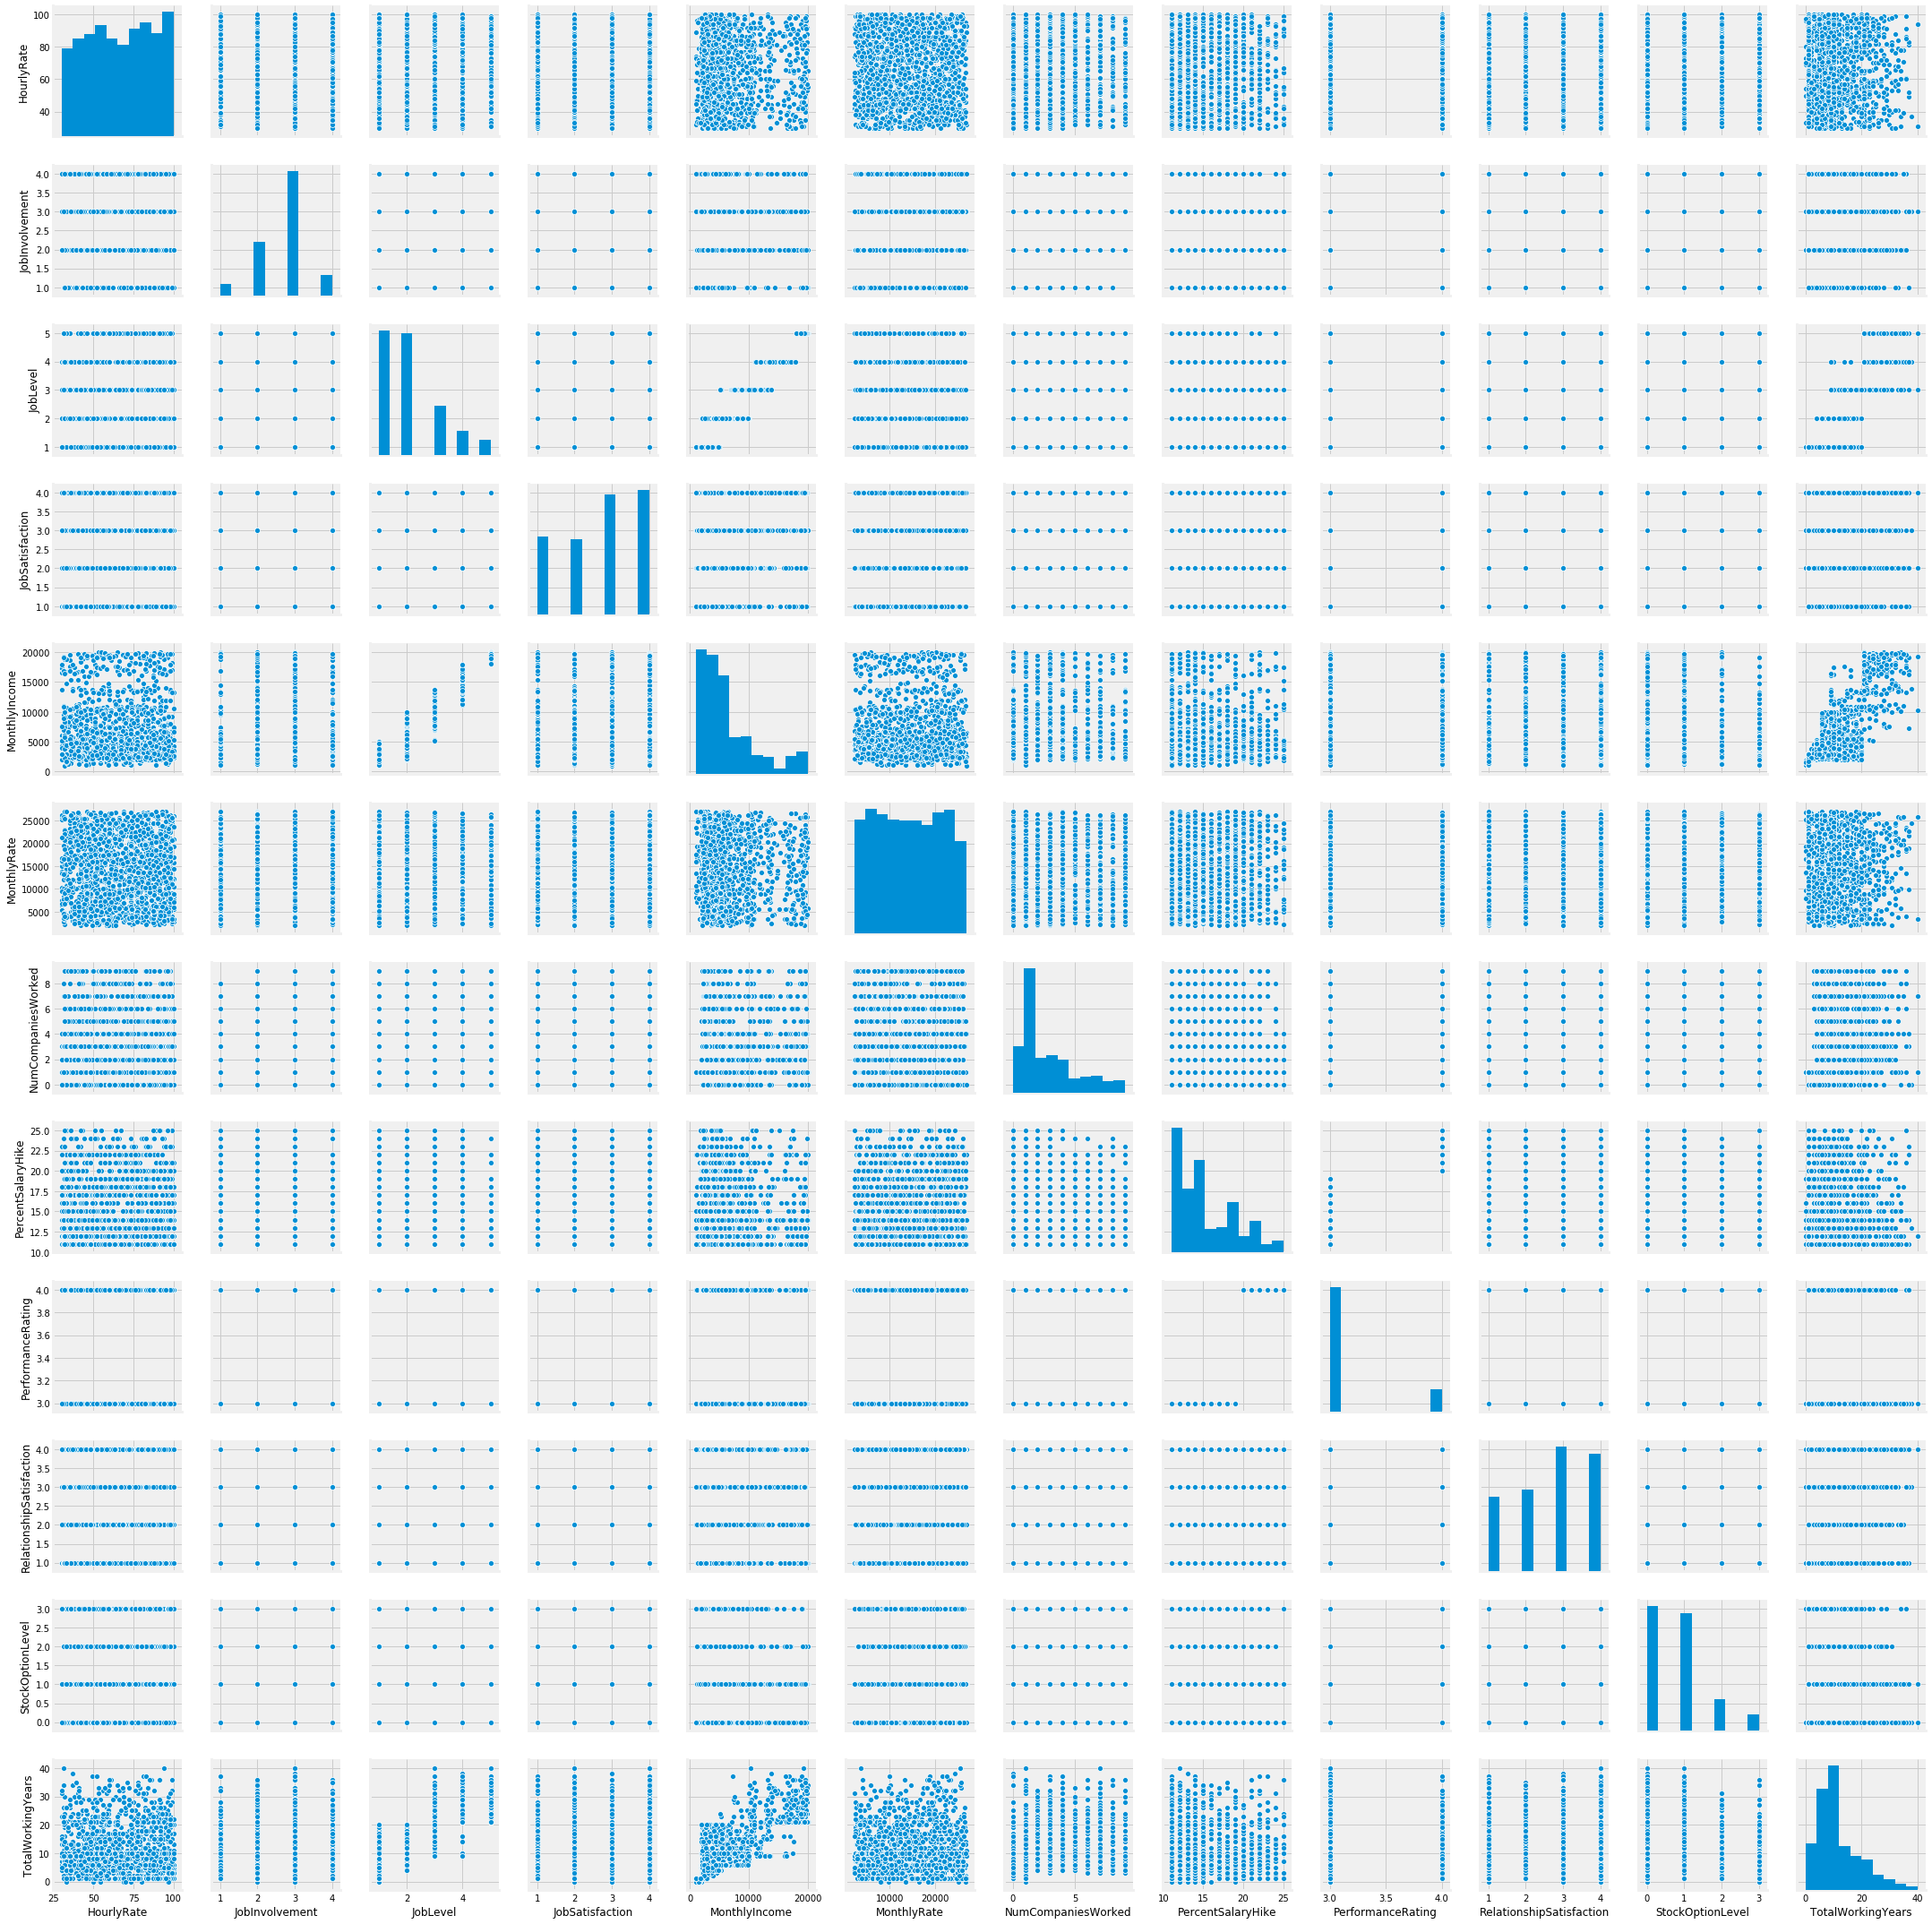

In [41]:
sns.pairplot(atr1[integer_feats_set6]);

In [42]:
print(list(atr1.corr()['Attrition_Yes'].sort_values(ascending=False).abs()[1:16].index))
print('\n')
print(print(list(atr1.corr()['Attrition_Yes'].sort_values(ascending=False).abs()[1:16])))

['OverTime_Yes', 'MaritalStatus_Single', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'JobRole_Laboratory Technician', 'Department_Sales', 'DistanceFromHome', 'EducationField_Technical Degree', 'EducationField_Marketing', 'NumCompaniesWorked', 'JobRole_Human Resources', 'Gender_Male', 'JobRole_Sales Executive', 'MonthlyRate', 'PerformanceRating']


[0.24611799424579708, 0.17541855360922304, 0.1572342701147958, 0.11514276554505017, 0.09829048545960378, 0.08085520213605311, 0.07792358295570358, 0.06935459476481899, 0.05578066572176351, 0.04349373905781376, 0.03621508206985559, 0.029453253175140102, 0.019774368459259877, 0.015170212530471421, 0.002888751711080946]
None


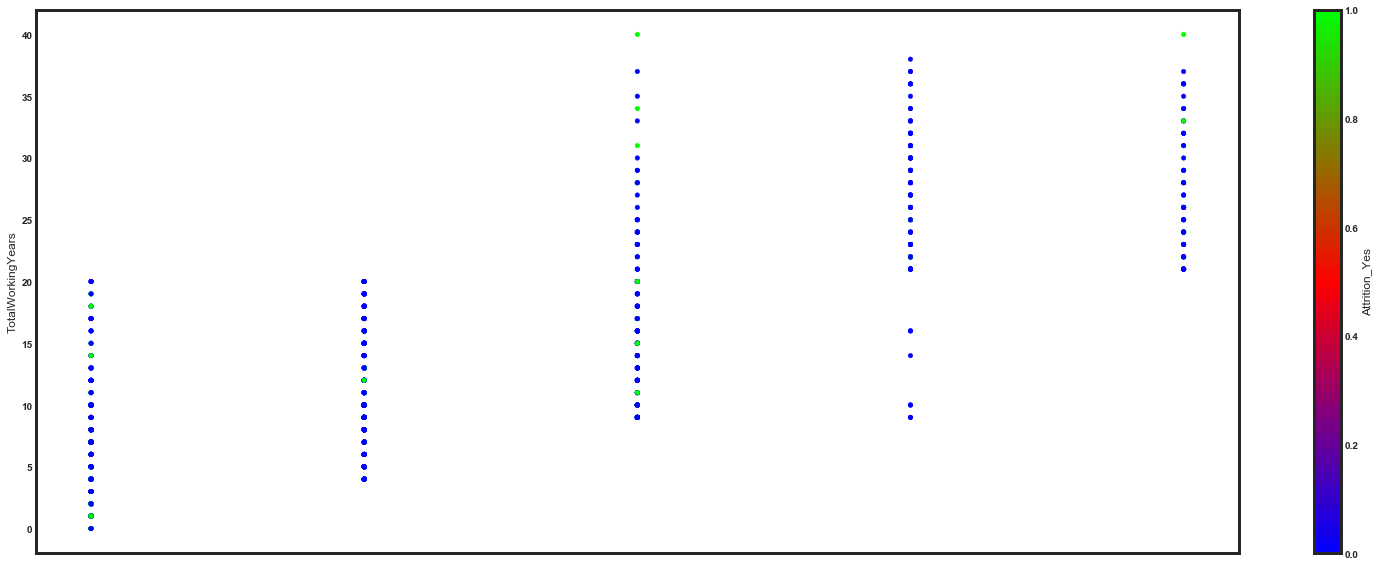

In [113]:
atr1.plot(kind='scatter', x='JobLevel', y='TotalWorkingYears', c='Attrition_Yes', colormap='brg');

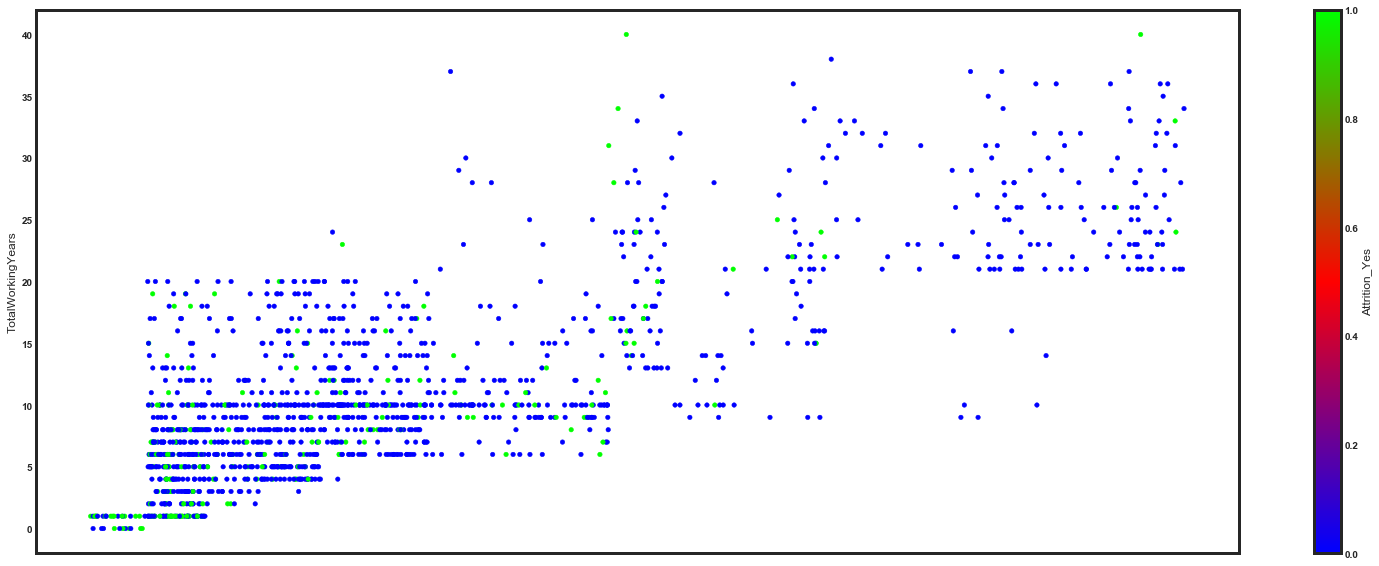

In [111]:
atr1.plot(kind='scatter', x='MonthlyIncome', y='TotalWorkingYears', c='Attrition_Yes', colormap='brg');

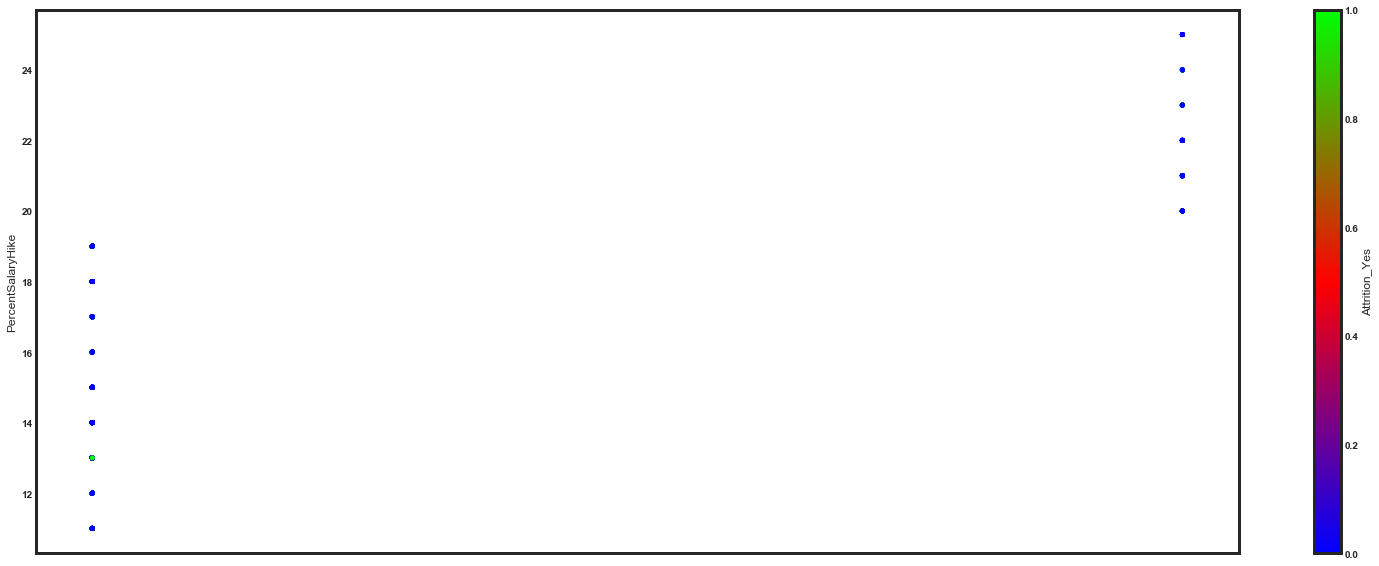

In [112]:
atr1.plot(kind='scatter', x='PerformanceRating', y='PercentSalaryHike', c='Attrition_Yes', colormap='brg');

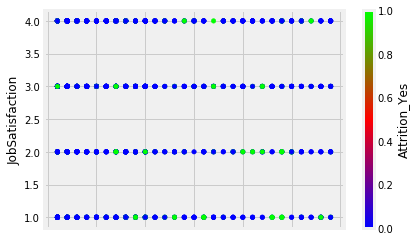

In [53]:
atr1.plot(kind='scatter', x='DistanceFromHome', y='JobSatisfaction', c='Attrition_Yes', colormap='brg');

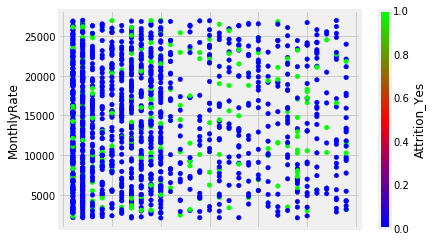

In [52]:
atr1.plot(kind='scatter', x='DistanceFromHome', y='MonthlyRate', c='Attrition_Yes', colormap='brg');

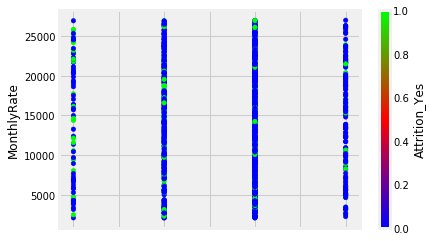

In [57]:
atr1.plot(kind='scatter', x='JobInvolvement', y='MonthlyRate', c='Attrition_Yes', colormap='brg');

In [44]:
atr1_features = list(atr1.corr()['Attrition_Yes'].sort_values(ascending=False).abs()[1:4].index)

In [45]:
for_plotting = atr1_features + ['Attrition_Yes']
for_plotting1 = integer_features + ['Attrition_Yes']

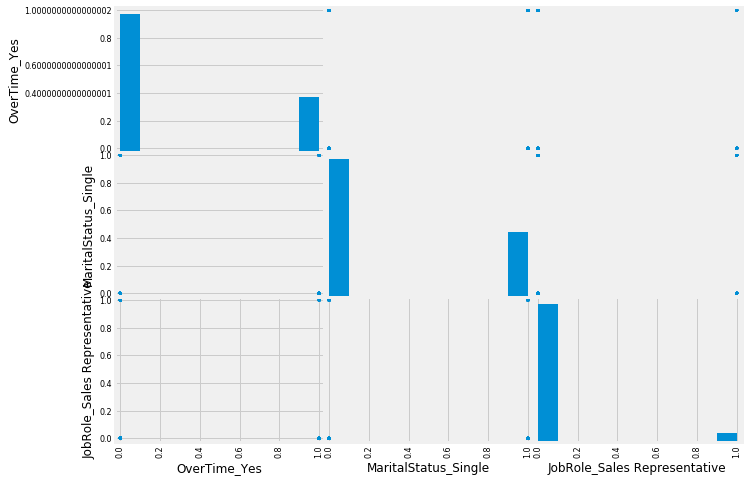

In [46]:
pd.plotting.scatter_matrix(atr1[atr1_features], figsize=(10, 8));

In [47]:
#pd.plotting.scatter_matrix(atr1.drop('Attrition_Yes', axis=1), c = atr1['Attrition_Yes'],figsize=(16, 12));

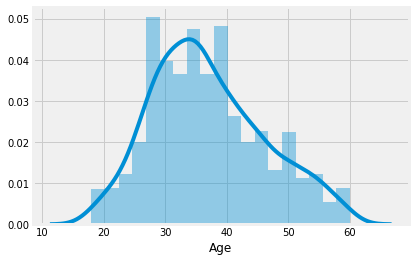

In [49]:
sns.distplot(atr1['Age']);

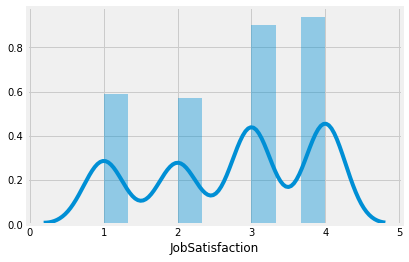

In [55]:
sns.distplot(atr1['JobSatisfaction']);

In [50]:
#atr1.plot(kind='scatter', x='Attrition_Yes', y='', c='Attrition_Yes', colormap='brg');

In [51]:
feature_cols = ['Age', 'JobInvolvement', 'WorkLifeBalance', 'PerformanceRating', 'MonthlyIncome', 'PercentSalaryHike','MaritalStatus']

In [ ]:
# Need to do some feature engineering, then look at predictor and actual (e.g. level and time in company, salary and age, number of companies worked, etc.)  See who is an anomoly from predicted values and then if they attrited or not.  
# Also need to do smote - oversampling.  
#  Need to figure out which features to select and who to engineer
#  Move into modeling
